# Lab 8  356

## Agglomerative clustering in Python

```linkage()``` performs agglomerative clustering. The most important parameters are ```method``` and ```metric```. The method parameter specifies the measure of similarity, such as single, complete, and centroid. The metric parameter specifies the kind of distance between instances, such as Euclidean distance. The rest of the parameters and matching values can be found in scipy documentation for hierarchical clustering.

The dendrogram function plots a dendrogram given a dataframe. The scipy documentation for dendrograms lists the parameters and corresponding values. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Sometimes, a more convenient way of structuring the data for clustering is by using a distance matrix. The agglomerative clustering model can take in a distance matrix as input by using the squareform function from the spatial.distance package.

Researchers studying chemical properties of wines collected data on a sample of white wines in Northern Portugal. A research goal was to cluster wines based on similar chemical properties.

Cluster wines with single linkage.
The code provided creates a dataframe with two features (residual_sugar and fixed_acidity), normalizes the dataframe, creates a distance matrix, and displays the cluster membership of each data point.

In [60]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

In [44]:
wine = pd.read_csv('wine1.csv')
wine.head()

,residual_sugar,fixed_acidity,chlorides,density,free_sulfur_dioxide
0,12.20,7.4,0.050,0.99730,57.0
1,13.90,7.7,0.050,0.99855,44.0
2,1.60,6.4,0.092,0.99280,40.0
3,1.45,8.1,0.033,0.99080,11.0
4,16.20,8.5,0.074,0.99800,41.0


In [45]:
# Calculate a distance matrix with selected variables
X = wine[['residual_sugar', 'fixed_acidity']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pdist() calculates pairs of distances between each instance in the dataset
dist = pdist(X)

clusterModel = linkage(dist, method='single')

# Compute the distance matrix
dist = pdist(X_scaled)

# Perform hierarchical clustering using the centroid method
#clusterModel = linkage(dist, method='centroid')
print(clusterModel)

[[16.         20.          0.          2.        ]
 [ 3.         15.          0.26925824  2.        ]
 [ 5.         10.          0.28284271  2.        ]
 [ 2.         29.          0.36055513  3.        ]
 [14.         30.          0.36055513  4.        ]
 [ 8.         13.          0.4         2.        ]
 [ 9.         18.          0.4472136   2.        ]
 [22.         28.          0.54083269  3.        ]
 [ 7.         34.          0.60827625  4.        ]
 [12.         32.          0.64031242  3.        ]
 [ 6.         36.          0.67082039  4.        ]
 [ 0.         25.          0.67082039  2.        ]
 [19.         31.          0.8         5.        ]
 [17.         23.          0.80622577  2.        ]
 [33.         40.          0.82462113  4.        ]
 [35.         39.          0.89442719  9.        ]
 [27.         38.          0.9486833   4.        ]
 [ 1.         43.          1.          5.        ]
 [11.         44.          1.0198039   6.        ]
 [ 4.         26.          1.08

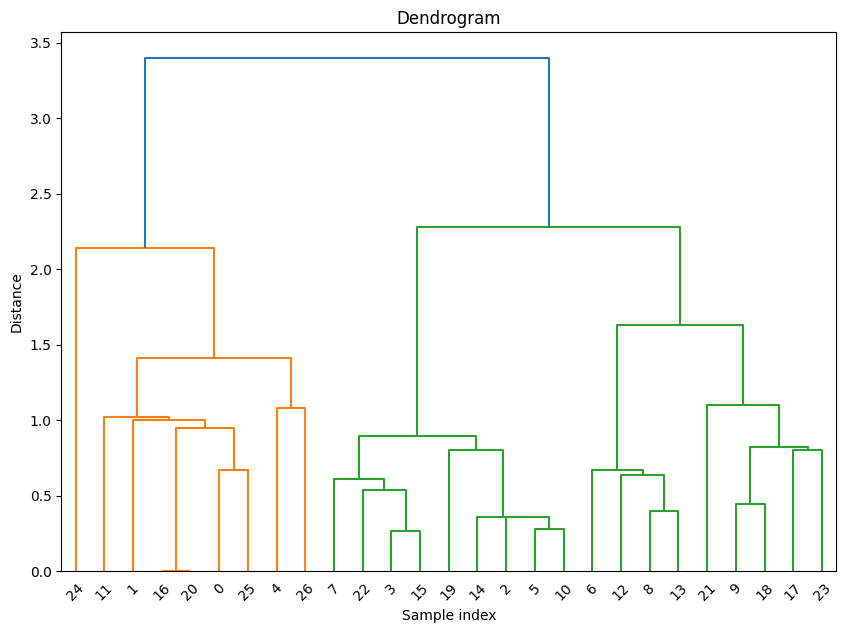

In [46]:

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [47]:
clusterModel2 = linkage(dist, method='centroid')

print(clusterModel2)

[[16.         20.          0.          2.        ]
 [ 8.         13.          0.07438402  2.        ]
 [ 3.         15.          0.1484012   2.        ]
 [ 2.         14.          0.16883981  2.        ]
 [17.         23.          0.20492322  2.        ]
 [ 5.         10.          0.28430552  2.        ]
 [ 9.         18.          0.2915122   2.        ]
 [21.         31.          0.34999451  3.        ]
 [ 1.         26.          0.38369964  2.        ]
 [ 6.         12.          0.4372683   2.        ]
 [ 0.         27.          0.45471429  3.        ]
 [30.         32.          0.49404718  4.        ]
 [22.         29.          0.5047157   3.        ]
 [ 7.         33.          0.53942352  3.        ]
 [25.         37.          0.58804443  4.        ]
 [36.         40.          0.70772449  5.        ]
 [34.         38.          0.81498828  7.        ]
 [28.         42.          0.821074    7.        ]
 [24.         41.          1.00873263  5.        ]
 [ 4.         35.          1.03

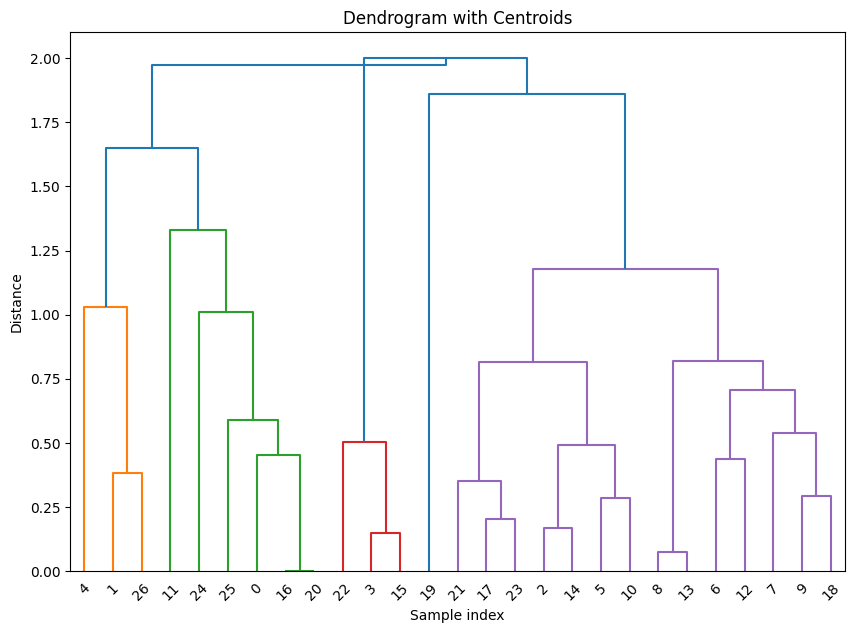

In [48]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel2)
plt.title('Dendrogram with Centroids')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


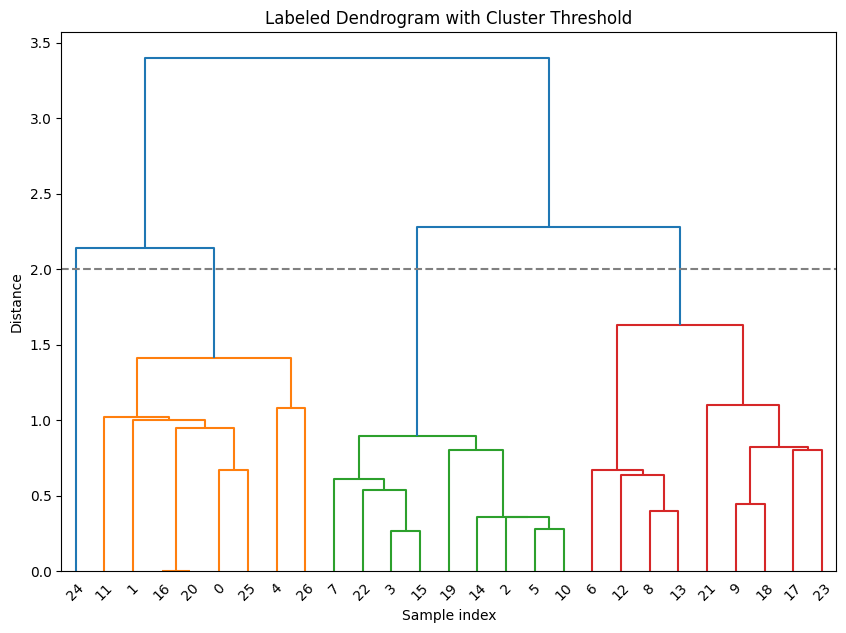

In [49]:
cluster_labels = fcluster(clusterModel, t=2.0, criterion='distance')

plt.figure(figsize=(10, 7))
dendrogram(clusterModel, color_threshold=threshold)
plt.axhline(y=threshold, color='gray', linestyle='--')
plt.title("Labeled Dendrogram with Cluster Threshold")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

1. What does linkage mean? single? linkage matrix?

Linkage refers to how the distance between two different clusters are calculated in hierarchical clustering. Single linkage is is the shortest distance between any two points in each cluster. A linkage matrix is pretty much the result of the hierarchical clustering, meaning its a 2D array with each row represnting how two clusters were merged and a dendogram is the visual representation of the linkage matrix.

2. Interpret the linkage matrix and dendrogram together- what is happening in each step in the printout of the clusterModel?

In each step of the printout of the clusterModel it is finding the two closest data points, merging them, and then finding the next closest and merging them and repeats until all points are merged. Each row represents one of the merging steps and it prints out rows and each row in the printout corresponds to a branch in the dendrogram.

3. Change the linkage method to centroid. Plot it above, in addition to the first plot. How did your dendrogram change?

By changing the linkage method to centrid I found that merges with the single linkage occur at higher averages distances as the y-axis goes up to 3.5 instead of just 2 with the centroid linkage. The single linkage method also seems to have a lot of clusters forming at lower distances. Logically this does make sense since it is choosing the two points that have the lowest distance apart. 

4. What does centroid mean?

A centroid is the average position of all the data points in a single cluster. 

5. What distance would you choose to decide the number of clusters?

To decide what distance to use I would look for the longest vertical gap between merges so for the single linkage I would choose a distance of about ~2 that would form 3 ish clusters and for the centroid linkage I would choose a distance of ~1.5 which would form 4 ish clusters. 

6. What is one way you could use this visualization to understand more about your samples?

A dendrogram tells us a lot about our samples, for example it tells us that when merges happen very early, these samples are very similar. When a sample remains unmerged for a long time such as a straight line down this might represent an outlier. And overal it just shows us the natural groupings and how our clusters are related to each other.

7. How might you label your clusters? Try to label your clusters and replot your dendrogram

To label the cluster I just color coded each of the clusters that are formed below the threshold of 2.0. This makes the clusters easier to see and also better shows the possible outliers. 

## DBSCAN
The main idea behind the DBSCAN algorithm is that connected core points and corresponding boundary points form a single cluster. An instance that is neither a core point nor a boundary point will be classified as an outlier.

The DBSCAN algorithm requires two parameters:

epsilon or ε - the radius of the spherical region
min_samples - the minimum number of samples, or instances, for a point to be a core point

Given ε and min_samples, the following steps outline the DBSCAN algorithm:

Step 1: Count the number of points within the ε-neighborhood of each instance and classify as core points instances whose ε-neighborhood has at least min_samples of points.

Step 2: Identify the core points that are within the ε-neighborhood of other core points. These connected core points form a single cluster.

Step 3: Assign points that are within the ε-neighborhood of a cluster to that cluster.

Step 4: Assign points that are not within the ε-neighborhood of a cluster as outliers.

In [50]:
from sklearn.cluster import DBSCAN
wineDB = pd.read_csv('wine2.csv')
wineDB

,sulphates,total_sulfur_dioxide,density,citric_acid,alcohol
0,0.38,80,0.99320,0.10,9.3
1,0.46,135,0.99200,0.42,11.0
2,0.50,167,1.00100,0.40,8.7
3,0.46,122,0.99270,0.27,10.3
4,0.37,87,0.98980,0.36,12.7
5,0.37,76,0.99050,0.26,10.9
6,0.52,206,0.99400,0.26,9.8
7,0.75,138,0.99170,0.37,11.4
8,0.42,124,0.98980,0.24,12.4
9,0.95,117,0.99340,0.36,9.5


In [51]:

# Create an input matrix with selected features
X_2 = wineDB[['sulphates', 'total_sulfur_dioxide']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel2 = DBSCAN(eps=0.69, min_samples=3)

dbModel2 = dbModel2.fit(X)

print(dbModel2.labels_)

[-1 -1  0  1 -1  0  2  1  2 -1  0 -1  2  2  0  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1]


In [52]:
wineDB = pd.read_csv('wine2.csv')

# Create an input matrix with selected features
X_2 = wineDB[['density', 'alcohol']]
    
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel = DBSCAN(eps=0.69, min_samples=3)

dbModel = dbModel.fit(X)
print(dbModel.labels_)

[-1 -1  0  1 -1  0  2  1  2 -1  0 -1  2  2  0  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1]


8. What do the -1's all mean (assuming for the last two input matrices you got all -1's)?

In DBSCAN when a point is -1 it means that the point is either noise or an outlier. Since all of the points were -1 DBSCAN was unable to find any clusters.
   
9. How can you fix this? (hint try an eps of .69 and min_samples=3) What does this mean?

Eps is the maximum distance between two samples that two points can have and still be considered neighbors of each other. If we increase this it lets more points be considered neighbors. Min_samples is the minimum samples that are required to form a cluster. If we reduce this it means that smaller groups of points can be considered clusters. Both of these things just make the algorithm more leniant and result in more clusters and less noise. 
    
10. Plot one of your results below.

There are four clusters but they are a little weird, the purple cluster is sort of all over the place. I was having trouble plotting this so maybe I did something wrong? Maybe it's supposed to look like this?

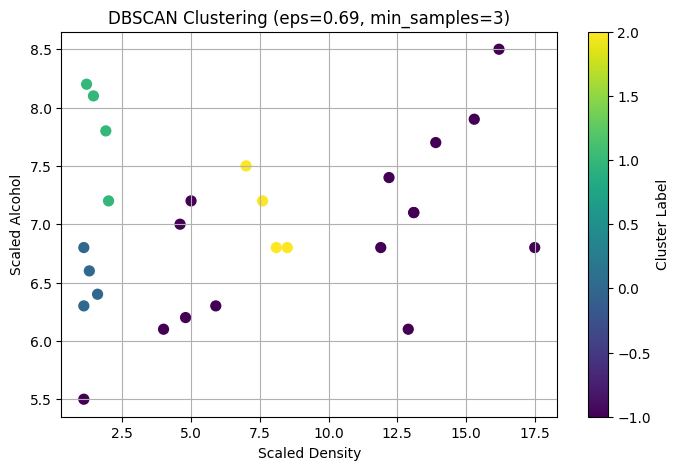

In [54]:
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbModel.labels_, cmap='viridis', s=50)

plt.title("DBSCAN Clustering (eps=0.69, min_samples=3)")
plt.xlabel("Scaled Density")
plt.ylabel("Scaled Alcohol")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


In [57]:
!pip install tpot

Defaulting to user installation because normal site-packages is not writeable


In [61]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define TPOT search parameters
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOT to find the best pipeline
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test set
accuracy = tpot.score(X_test, y_test)
print("Test set accuracy:", accuracy)


# Export the final pipeline code
tpot.export('tpot_iris_pipeline.py')


/home/jupyter-stachb/CS356/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/jupyter-stachb/CS356/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/home/jupyter-stachb/CS356/lib/python3.12/site-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/home/jupyter-stachb/CS356/lib/python3.12/site-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: 0.9833333333333334
                                                                             
Generation 2 - Current best internal CV score: 0.9833333333333334
                                                                             
Generation 3 - Current best internal CV score: 0.9833333333333334
                                                                              
Generation 4 - Current best internal CV score: 0.9833333333333334
                                                                              
Generation 5 - Current best internal CV score: 0.9833333333333334
                                                                              
Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=10.0, fit_prior=False), C=25.0, dual=False, penalty=l2)
Test set accuracy: 1.0


11. Go to http://epistasislab.github.io/tpot/ , read about this tool
12. What is TPOT good for? What is it not good for?

TPOT is good for automated machine learning meaning that it automatically finds the best ML pipeline to use for a dataset. It explores many different models so it saves us a lot of time in testing which model would be the best fit. TPOT is not good for small datasets as it might overfit and it often takes a while to figure out which model is the best. 

13. Which algorithms does TPOT check?

TPOT checks for the models and transformers from scikit-learn such as logistic regression, random forests, PCA, and many others. 

14. In the code above, what do the parameters mean? # Do NOT be so simplistic with your metrics, this is a code sample above.

Generations=5 sets the number of generations that TPOT will evolve the population of pipelines through. A higher number of generations means more accurate results but slower runtime.

Population_size=20 defines the number of pipelines TPOT has in each generation. Each pipeline inludes preprocessing steps + models. Since the population_size is set to 20 that means that each generation will test 20 different pipelines. 

Verbosity=2 controls how much is printed to the console while TPOT is running. Since verbosity is set to 2 there will be detailed output for pipelines in each generation. 

Random_state=42 sets the random seed for all the random operators. This is to ensure reproductibility as without this, each time there would be different results.

17. In a new notebook, do:
    -- DBSCAN on aspect of your data and visualize
    - TPOT on an aspect of your final project, and implement its suggestion plus report on your results
    - Dendrogram that is readable and legible (you can take representative samples from your data)
    - Spelling counts from now on! (too many misspelled words in your notebooks)

I used TPOT a couple of times in the final project notebook that I am turning in, I don't feel like DBSCAN or Dendrograms would be that useful so I just worked on my notebook and made a lot of progress using TPOT.